In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Data Preprocessing and Visualization

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
left=df[df.left==1]
left.shape

(3571, 10)

In [9]:
retained=df[df['left']==0]
retained.shape

(11428, 10)

In [158]:
df.groupby('left').mean()

C:\Users\Ayush Sinha\AppData\Local\Temp\ipykernel_16328\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [15]:
df.salary

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

<Axes: xlabel='salary', ylabel='no. of employees'>

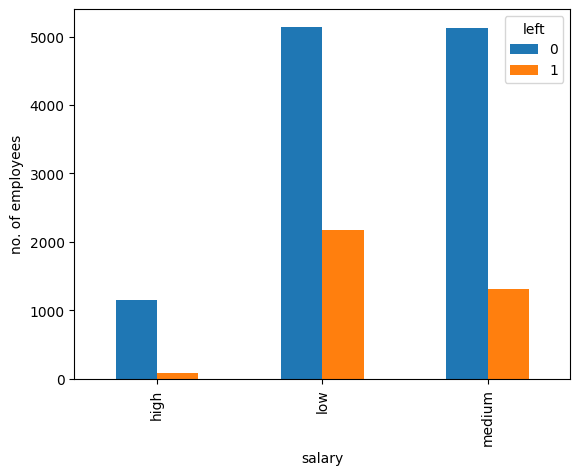

In [26]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar',ylabel='no. of employees')

<Axes: xlabel='Department'>

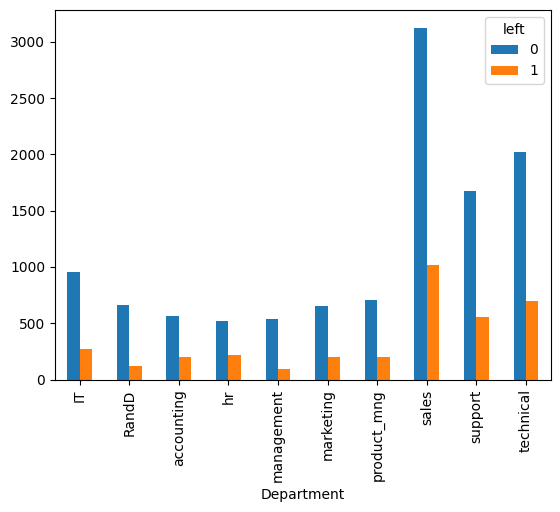

In [30]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')

In [32]:
elem_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
elem_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [33]:
dumies_df=pd.get_dummies(df['salary'])
dumies_df

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [36]:
merged=pd.concat([elem_df,dumies_df],axis=1)
merged

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [138]:
new_df=merged.drop(['salary','medium'],axis=1)
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [139]:
x=new_df
x

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [140]:
y=df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

# Train-Test Split

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Linear Regression 

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
reg=LinearRegression()

In [125]:
reg.fit(x_train,y_train)

LinearRegression()

In [132]:
reg.predict(x_test)

array([0.30668861, 0.12556688, 0.19099806, ..., 0.66341525, 0.0609167 ,
       0.18184894])

In [133]:
reg.score(x_test,y_test)

0.1779313339363936

# Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
log_reg=LogisticRegression()

In [145]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [146]:
log_reg.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [147]:
log_reg.score(x_test,y_test)

0.784

# KNN

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
knn=KNeighborsClassifier()

In [150]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [151]:
knn.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [152]:
knn.score(x_test,y_test)

0.8897777777777778

# Decision Tree Classifier 

In [159]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
dclf=DecisionTreeClassifier()

In [161]:
dclf.fit(x_train,y_train)

DecisionTreeClassifier()

In [162]:
dclf.predict(x_test)

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [163]:
dclf.score(x_test,y_test)

0.9202222222222223

# Random Forest Classifier

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [166]:
rfc.predict(x_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [167]:
rfc.score(x_test,y_test)

0.9335555555555556

In [168]:
from sklearn.metrics import classification_report, confusion_matrix

In [173]:
pred=knn.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3418
           1       0.76      0.80      0.78      1082

    accuracy                           0.89      4500
   macro avg       0.85      0.86      0.85      4500
weighted avg       0.89      0.89      0.89      4500



In [174]:
matrix=confusion_matrix(y_test,pred)
matrix

array([[3141,  277],
       [ 219,  863]], dtype=int64)

In [175]:
algorithms=['Linear Regression','Logistic Regression','KNN','Decision Tree','Random Forest']
accuracy=[0.1779,0.784,0.89,0.92,0.93]

In [176]:
xpos=np.arange(len(algorithms))
xpos

array([0, 1, 2, 3, 4])

<BarContainer object of 5 artists>

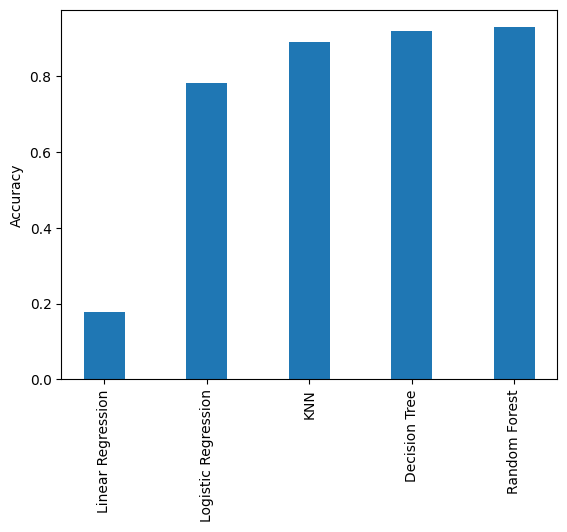

In [182]:
plt.xticks(xpos,algorithms,rotation=90)
plt.ylabel('Accuracy')
plt.bar(xpos,accuracy,width=0.4)